<a href="https://colab.research.google.com/github/chandanareddyyn/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction(SL)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  log_loss

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
bike_df=pd.read_csv('/content/SeoulBikeData.csv',encoding='latin')

In [ ]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
#Getting the shape of dataset with rows and columns
bike_df.shape

(8760, 14)

This Dataset contains 8760 lines and 14 columns.
In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [15]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Preprocessing Data Set**

**Duplicate values**

In [8]:
Dup=len(bike_df[bike_df.duplicated()])
print("Number of duplicate value is=",Dup)

Number of duplicate value is= 0


**Missing values**

**Why do we need to handle missing values?**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [ ]:
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

*There is no missing values and duplicate values present in the dataset*

**Display the column names**

In [16]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Rename the column names**

In [9]:
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_bike_count',
                                'Humidity(%)':'Humidity',
                                'Temperature(°C)':'Temperature',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_day'})

In [15]:
bike_df

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


****Breaking date column****

*Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.*

In [16]:
# Changing the "Date" column into three parts "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                   dt.datetime.strptime(x,"%d/%m/%Y"))

In [17]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [18]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [19]:
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  month                  8760 non-null   int64   
 14  weekdays_weekend       8760 non-null   i

In [20]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

**Changing data type**

*As "Hour","month","weekdays_weekend" columns are shown as  integer data type but actually those are category data type. so we need to change this data type. if not, then while doing the further anlysis and correlation with this the values will not be actually true so we can mislead by this.*

In [21]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [22]:
#let's display the columns
bike_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [23]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [24]:
bike_df['weekdays_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]

[Text(0.5, 1.0, 'Count of Rented bikes VS Month ')]

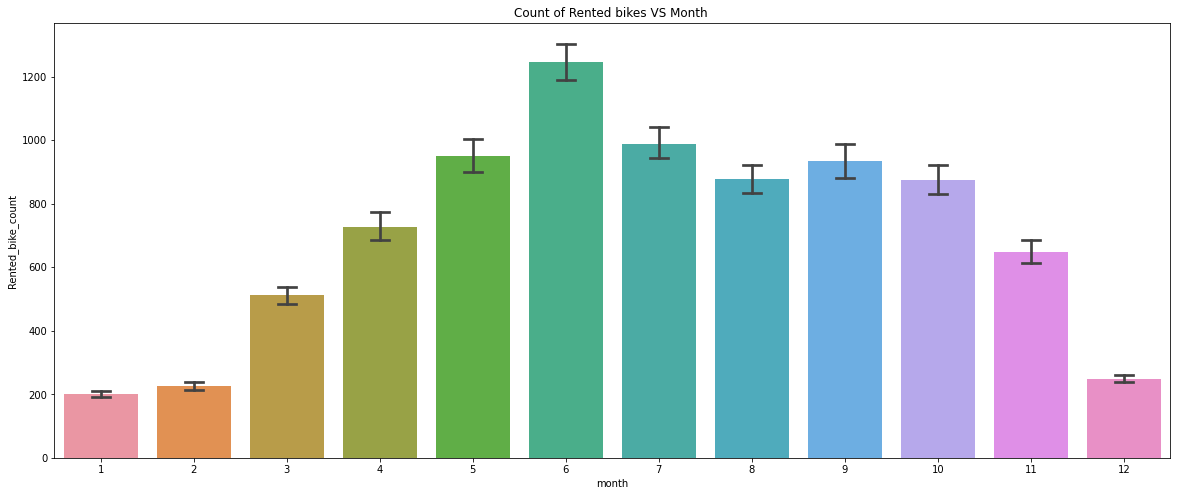

In [25]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='month',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes VS Month ')


**weekdays_weekend**

[Text(0.5, 1.0, 'Count of Rented bikes on weekdays and weekend ')]

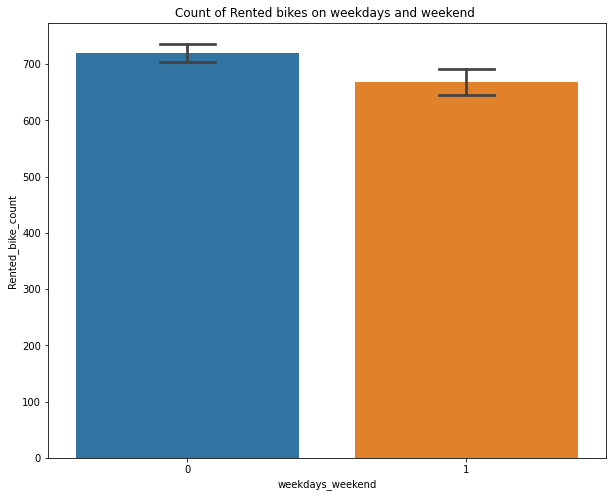

In [30]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes on weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes on weekdays_weekend with respect to peak hours')]

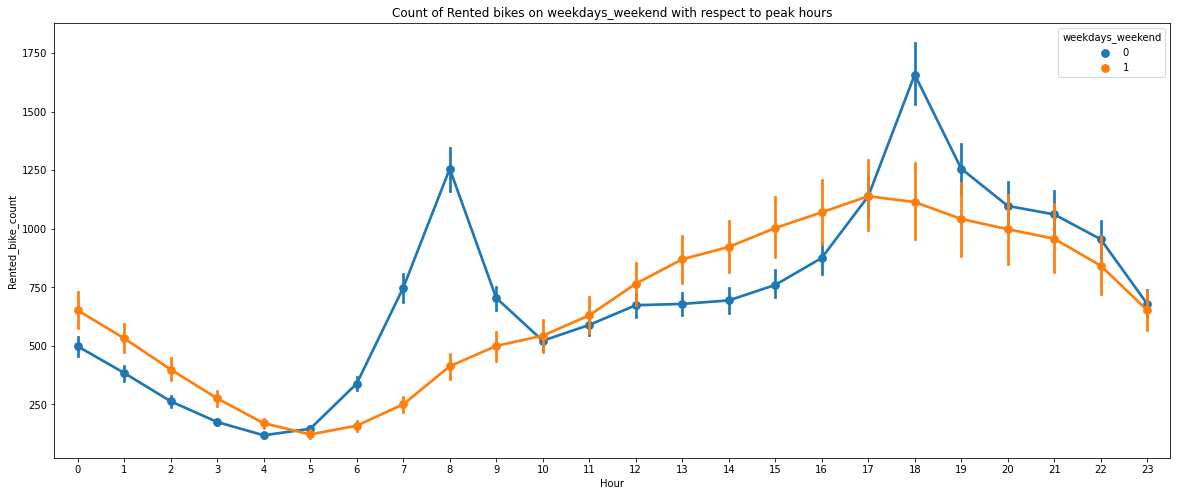

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes on weekdays_weekend with respect to peak hours')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

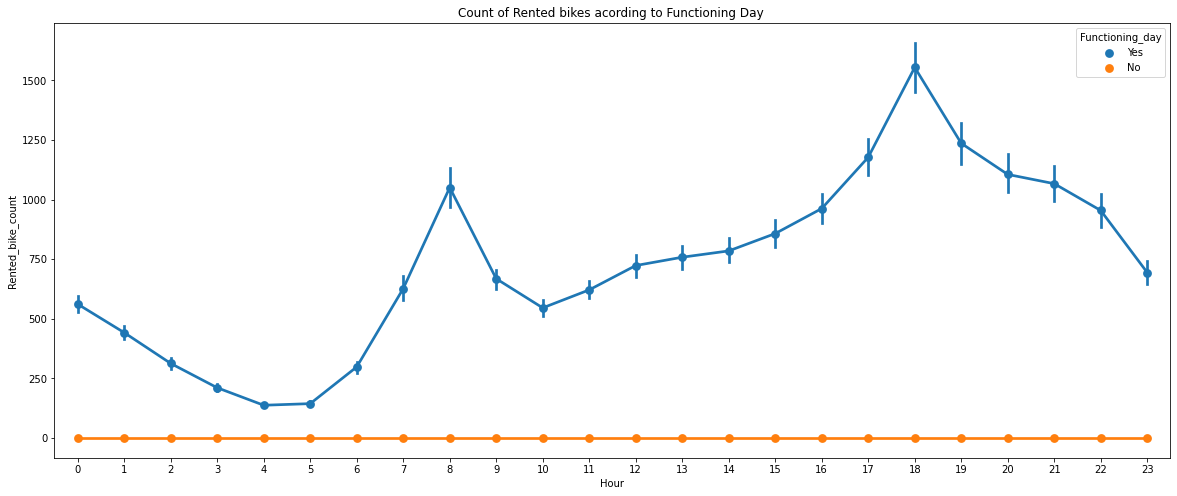

In [33]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_bike_count',hue='Functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

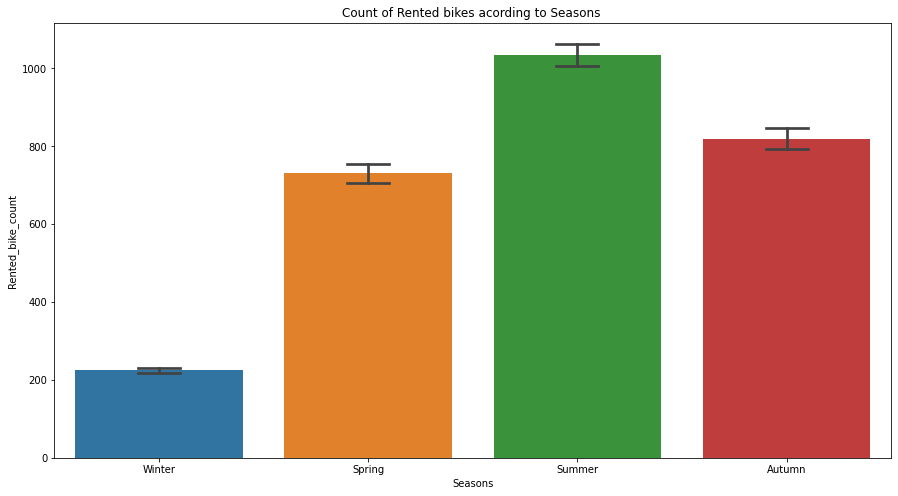

In [34]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

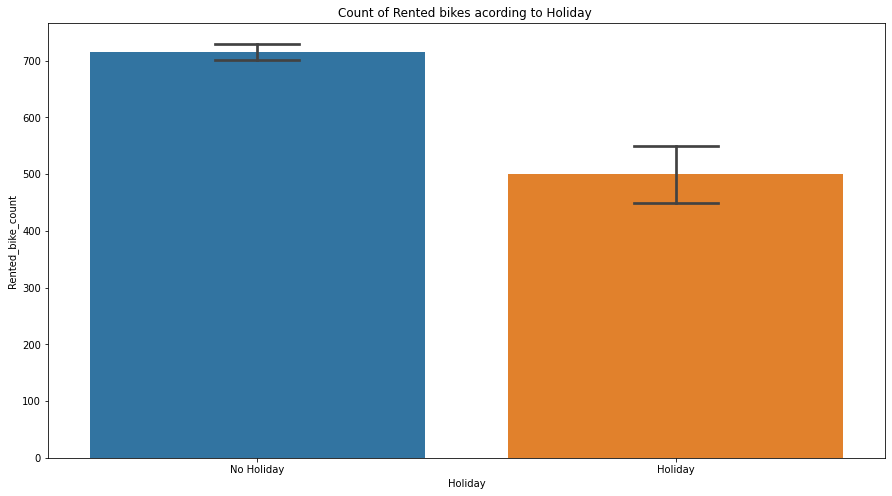

In [35]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [ ]:
Analyze of Numerical variables distplots

In [36]:
#assign the numerical coulmn to variavle
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

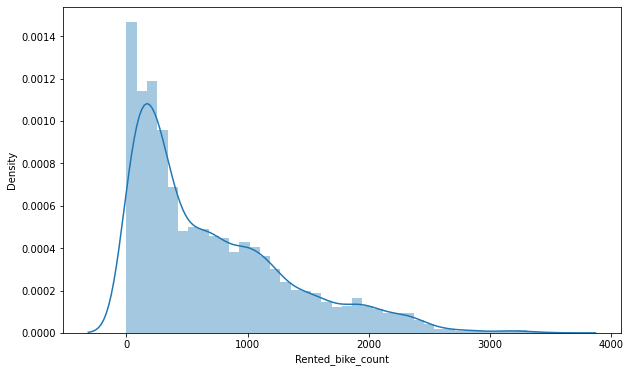

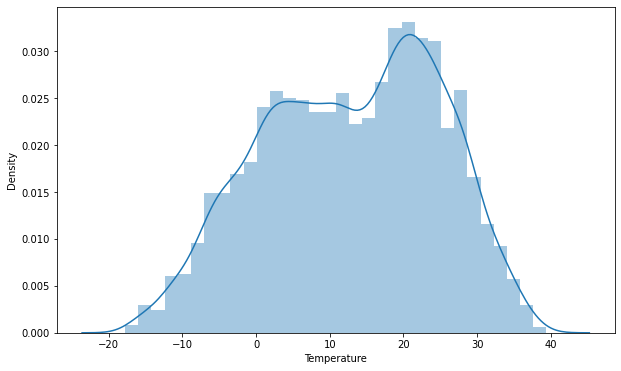

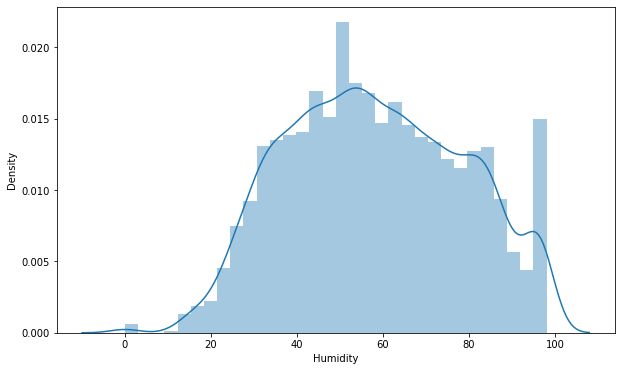

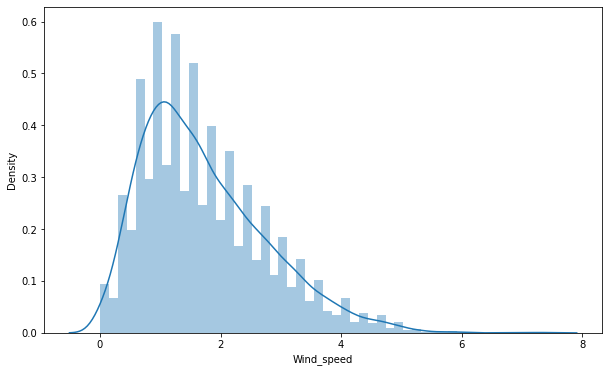

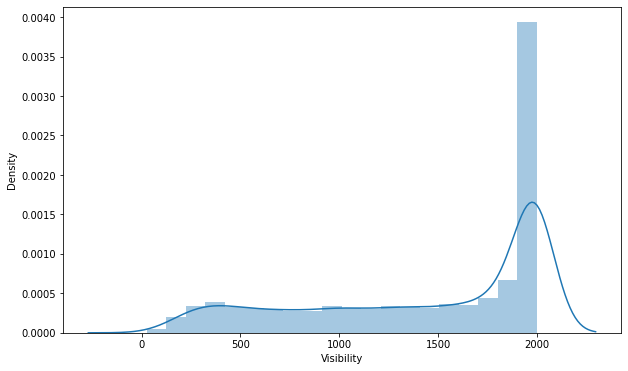

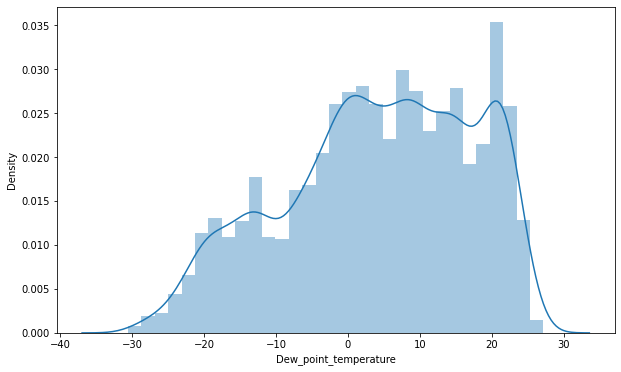

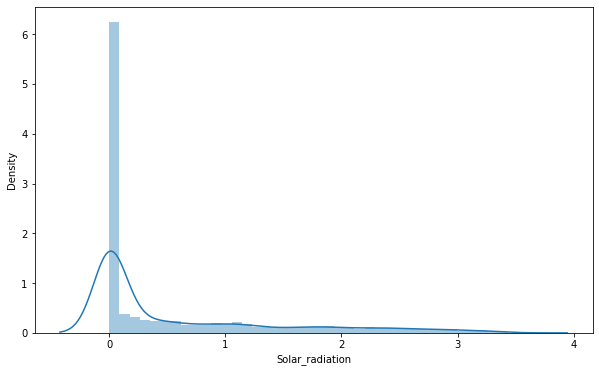

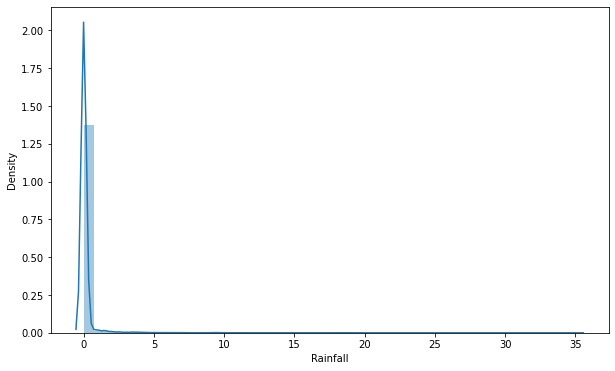

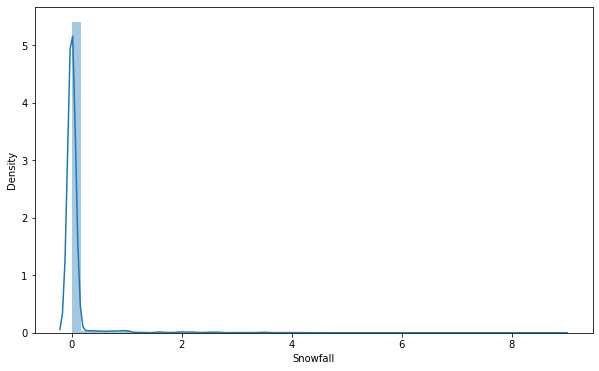

In [37]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#### Numerical vs.Rented_Bike_Count

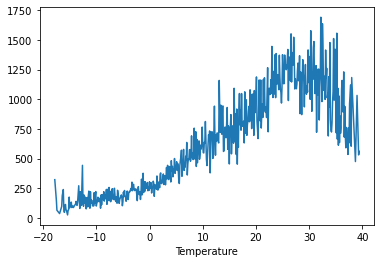

In [39]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
bike_df.groupby('Temperature').mean()['Rented_bike_count'].plot()


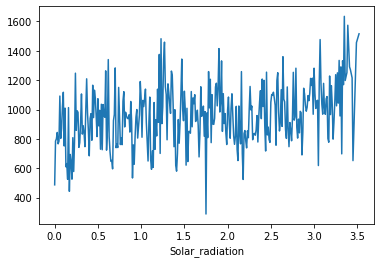

In [41]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
bike_df.groupby('Solar_radiation').mean()['Rented_bike_count'].plot()


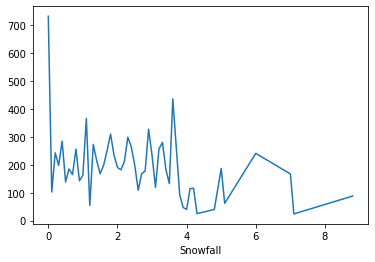

In [42]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
bike_df.groupby('Snowfall').mean()['Rented_bike_count'].plot()


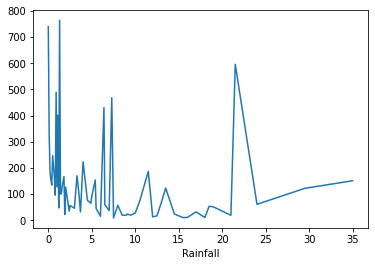

In [43]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
bike_df.groupby('Rainfall').mean()['Rented_bike_count'].plot()


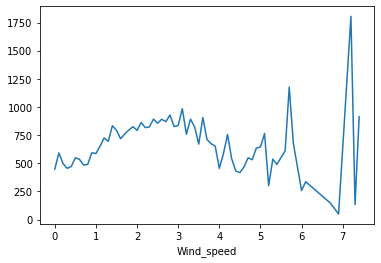

In [44]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
bike_df.groupby('Wind_speed').mean()['Rented_bike_count'].plot()

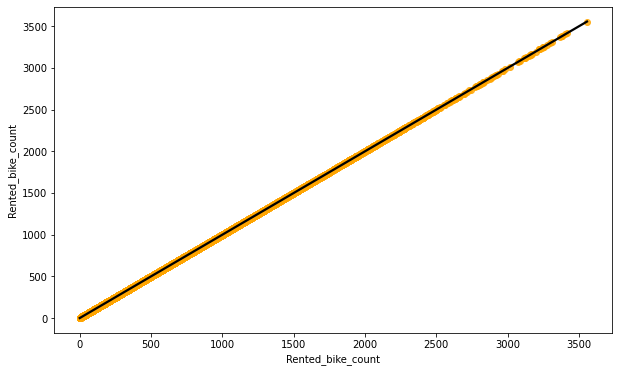

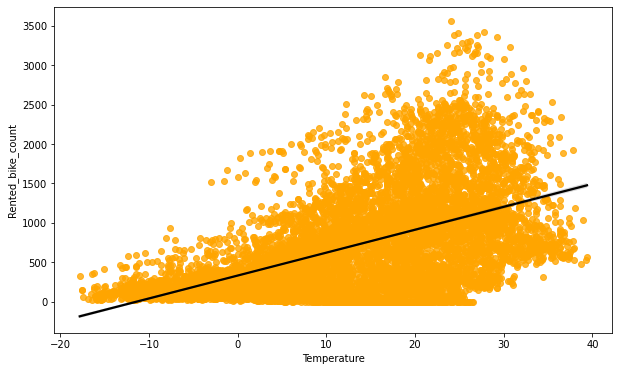

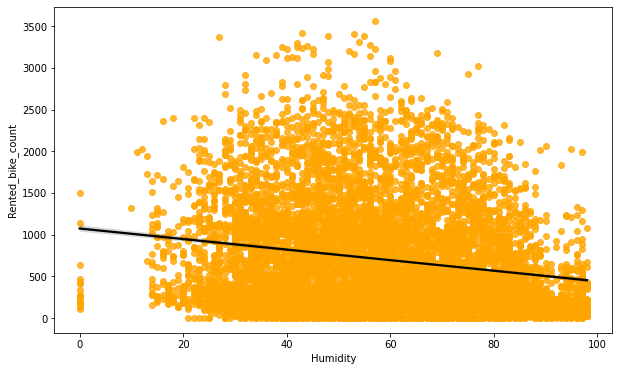

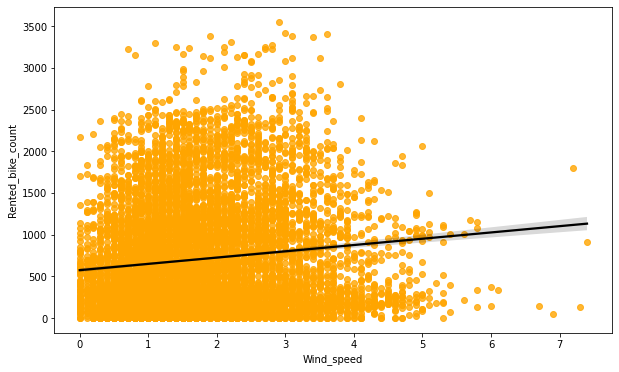

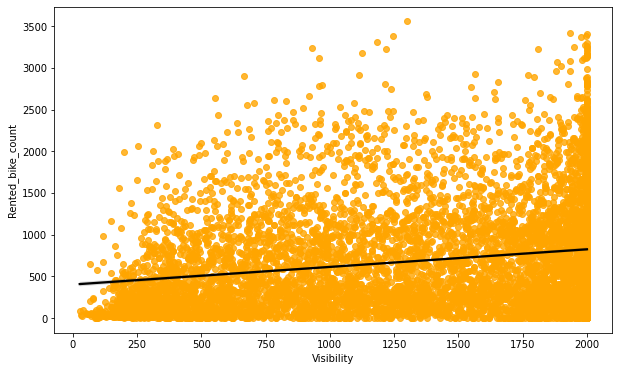

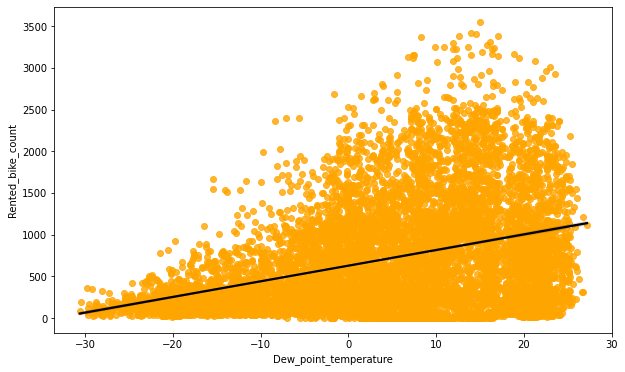

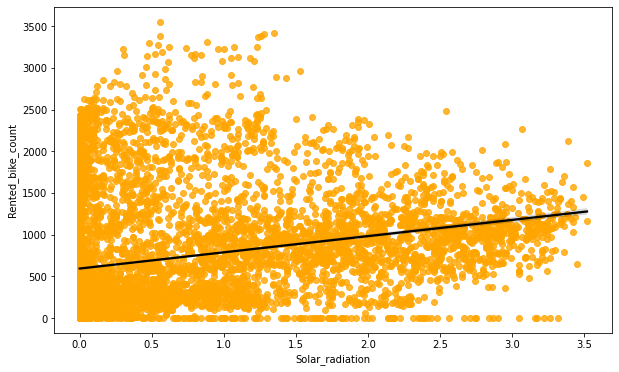

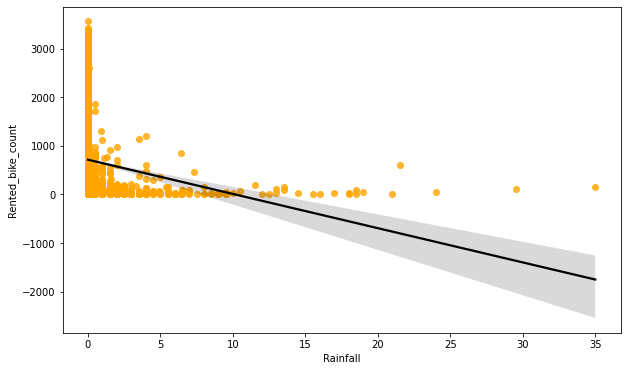

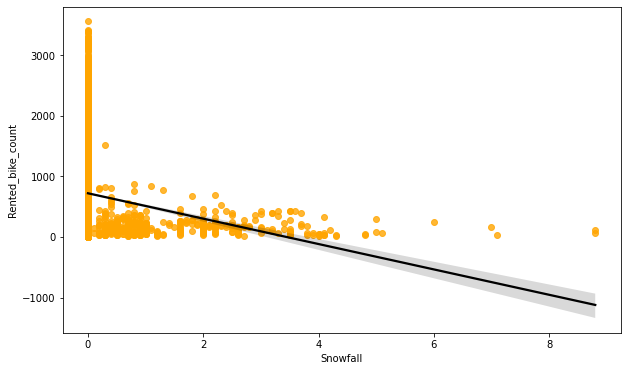

In [45]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_bike_count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

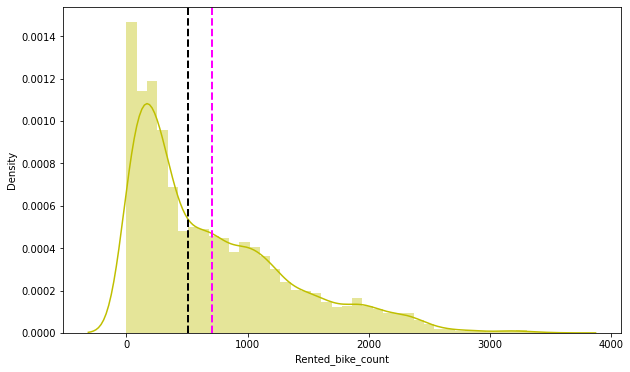

In [46]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_bike_count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_bike_count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

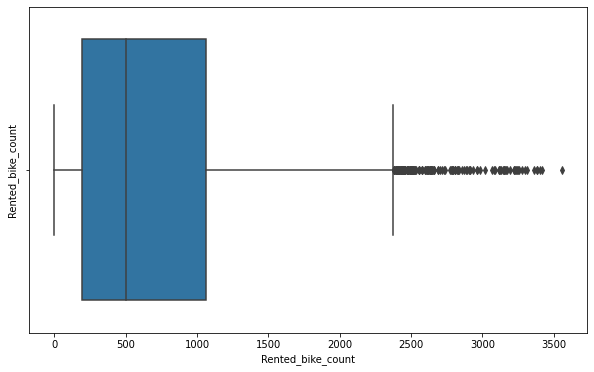

In [47]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_bike_count')
sns.boxplot(x=bike_df['Rented_bike_count'])
plt.show()

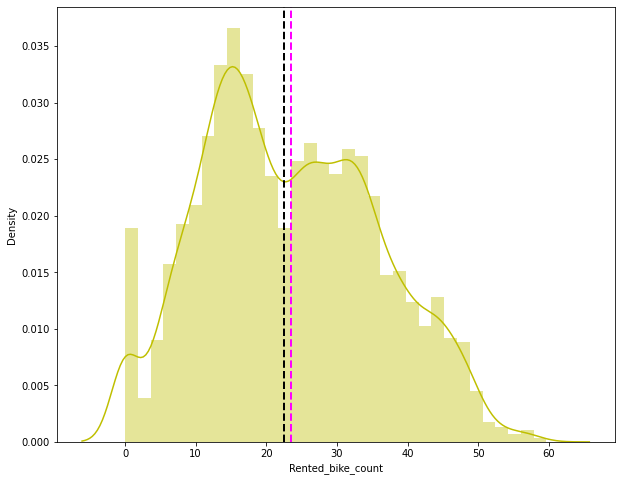

In [48]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented_bike_count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(bike_df['Rented_bike_count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

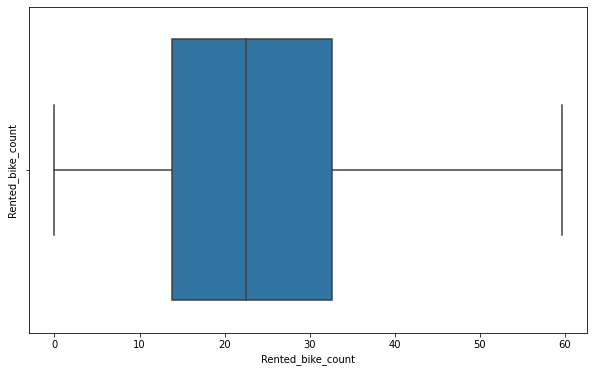

In [49]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_bike_count')
sns.boxplot(x=np.sqrt(bike_df['Rented_bike_count']))
plt.show()

In [50]:
bike_df.corr()

,Rented_bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
Rented_bike_count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


*After applying Square root to the Rented Bike Count column, we find that there is no outliers present.*

**Checking of Correlation between variables**

**Checking in OLS Model**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [55]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity','Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_bike_count']
bike_df.head()

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [56]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [57]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_bike_count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:50:15   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


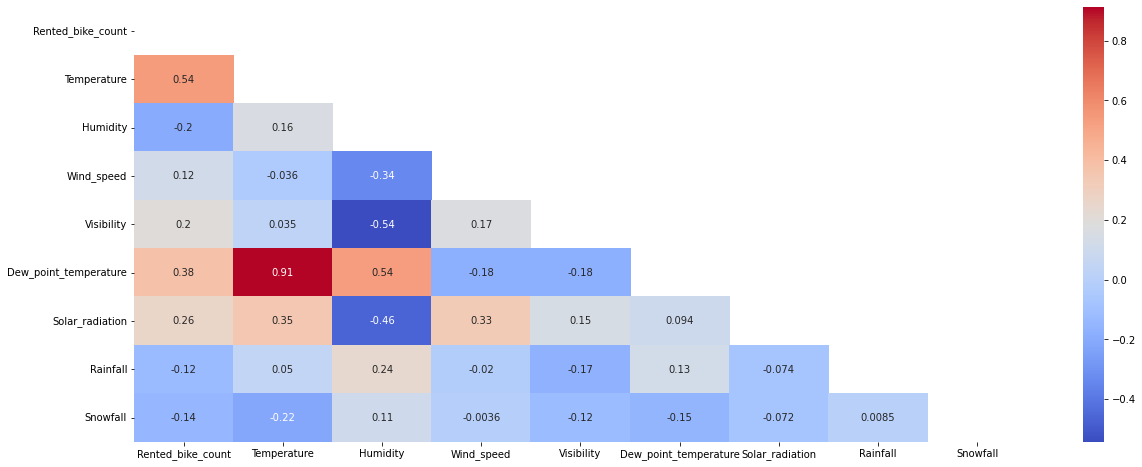

In [59]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

In [60]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [61]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_bike_count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


**Create the dummy variables**

In [62]:
#Assign all catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

**one hot encoding**

In [67]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()       

,Rented_bike_count,Temperature,Humidity,Wind_speed,Visibility,Solar_radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Model Training**

**Splitting data into Train data and Test data for Regression**

In [68]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_bike_count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_bike_count'])

In [69]:
X=bike_df
Y=bike_df

In [70]:
#splitting data set into training set and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [71]:
X_train.shape

(7008, 14)

In [73]:
X_train

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,month,weekdays_weekend
2031,312,15,8.2,62,0.6,291,1.22,0.0,0.0,Winter,No Holiday,Yes,2,0
6570,2836,18,28.4,57,2.4,2000,0.84,0.0,0.0,Summer,No Holiday,Yes,8,0
6371,711,11,29.9,57,1.7,1992,0.88,0.1,0.0,Summer,No Holiday,Yes,8,0
3490,756,10,14.8,29,0.6,1749,2.20,0.0,0.0,Spring,No Holiday,Yes,4,0
7700,1558,20,12.2,47,1.1,2000,0.00,0.0,0.0,Autumn,No Holiday,Yes,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,306,5,17.8,75,1.0,1210,0.00,0.0,0.0,Summer,No Holiday,Yes,6,0
7891,1968,19,16.4,47,1.0,1694,0.00,0.0,0.0,Autumn,No Holiday,Yes,10,0
4859,1066,11,25.5,57,1.8,943,3.01,0.0,0.0,Summer,No Holiday,Yes,6,0
3264,401,0,8.3,59,2.1,1912,0.00,0.0,0.0,Spring,No Holiday,Yes,4,0


In [72]:
X_test.shape

(1752, 14)

In [76]:
bike_df_copy.describe().columns

Index(['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

MSE formula = (1/n) * Σ(actual – forecast)2

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.



R2=1−Unexplained VariationTotal Variation /Total variation
​

R 2 =1− Total Variation Unexplained Variation​

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​

# LINEAR REGRESSION

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

y_pred=β0+β1x 

where
β0 and β1
are intercept and slope respectively.

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#feature scaling

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


NameError: ignored